# Explore here

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')

In [2]:
import os
from dotenv import load_dotenv

load_dotenv()

client_id = os.getenv('CLIENT_ID')
client_secret = os.getenv('CLIENT_SECRET')

if not client_id or not client_secret:
    print("Client ID or Client Secret not found. Please check your .env file and environment variable names.")
else:
    print("Client ID and Client Secret loaded successfully.")

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Crear un cliente de spotify con las credenciales de la API generada
try:
    sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))
    print("Spotify client created successfully.")
except Exception as e:
    print(f"An error occurred: {e}")


Client ID and Client Secret loaded successfully.
Spotify client created successfully.


Top 10 canciones de artistas

In [3]:
# Artista Pink Floyd
artist_id = "0k17h0D3J5VfsdmQ1iZtE9"

# Top Tracks
response = sp.artist_top_tracks(artist_id)
if response:
    tracks = response["tracks"]
    for i, track in enumerate(tracks, 1):
        track_info = {k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]}
        print(f"Track {i}:")
        print(f"  Name: {track_info['name']}")
        print(f"  Popularity: {track_info['popularity']}")
        print(f"  Duration (minutes): {track_info['duration_ms']:.2f}")
        print()
else:
    print("No tracks found for the given artist.")

Track 1:
  Name: Another Brick in the Wall, Pt. 2
  Popularity: 74
  Duration (minutes): 3.98

Track 2:
  Name: Wish You Were Here
  Popularity: 74
  Duration (minutes): 5.58

Track 3:
  Name: Comfortably Numb
  Popularity: 72
  Duration (minutes): 6.37

Track 4:
  Name: Breathe (In the Air)
  Popularity: 71
  Duration (minutes): 2.83

Track 5:
  Name: Money
  Popularity: 70
  Duration (minutes): 6.38

Track 6:
  Name: The Great Gig in the Sky
  Popularity: 69
  Duration (minutes): 4.73

Track 7:
  Name: Time
  Popularity: 69
  Duration (minutes): 6.90

Track 8:
  Name: Shine On You Crazy Diamond (Pts. 1-5)
  Popularity: 64
  Duration (minutes): 13.52

Track 9:
  Name: Hey You
  Popularity: 65
  Duration (minutes): 4.64

Track 10:
  Name: Have a Cigar
  Popularity: 64
  Duration (minutes): 5.13



In [4]:
# Artista The Beatles
artist_id_2 = "3WrFJ7ztbogyGnTHbHJFl2"

# Top Tracks
response = sp.artist_top_tracks(artist_id_2)
if response:
    tracks_2 = response["tracks"]
    for i, track in enumerate(tracks_2, 1):
        track_info = {k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]}
        print(f"Track {i}:")
        print(f"  Name: {track_info['name']}")
        print(f"  Popularity: {track_info['popularity']}")
        print(f"  Duration (minutes): {track_info['duration_ms']:.2f}")
        print()
else:
    print("No tracks found for the given artist.")

Track 1:
  Name: Here Comes The Sun - Remastered 2009
  Popularity: 84
  Duration (minutes): 3.10

Track 2:
  Name: Twist And Shout - Remastered 2009
  Popularity: 78
  Duration (minutes): 2.59

Track 3:
  Name: Yesterday - Remastered 2009
  Popularity: 77
  Duration (minutes): 2.09

Track 4:
  Name: Let It Be - Remastered 2009
  Popularity: 77
  Duration (minutes): 4.05

Track 5:
  Name: Come Together - Remastered 2009
  Popularity: 77
  Duration (minutes): 4.33

Track 6:
  Name: In My Life - Remastered 2009
  Popularity: 76
  Duration (minutes): 2.44

Track 7:
  Name: Blackbird - Remastered 2009
  Popularity: 76
  Duration (minutes): 2.31

Track 8:
  Name: Hey Jude - 2015 Mix
  Popularity: 66
  Duration (minutes): 7.19

Track 9:
  Name: I Want To Hold Your Hand - Remastered 2009
  Popularity: 72
  Duration (minutes): 2.45

Track 10:
  Name: Something - Remastered 2009
  Popularity: 73
  Duration (minutes): 3.04



Panda Dataframe para tracks de Pink Floyd

In [5]:
import pandas as pd

tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

print(tracks_df.head(3))

                                               album  \
7  {'album_type': 'album', 'artists': [{'external...   
9  {'album_type': 'album', 'artists': [{'external...   
8  {'album_type': 'album', 'artists': [{'external...   

                                             artists  disc_number  \
7  [{'external_urls': {'spotify': 'https://open.s...            1   
9  [{'external_urls': {'spotify': 'https://open.s...            1   
8  [{'external_urls': {'spotify': 'https://open.s...            2   

   duration_ms  explicit              external_ids  \
7       811077     False  {'isrc': 'GBN9Y1100085'}   
9       307733     False  {'isrc': 'GBN9Y1100087'}   
8       278440     False  {'isrc': 'GBN9Y1100108'}   

                                       external_urls  \
7  {'spotify': 'https://open.spotify.com/track/6p...   
9  {'spotify': 'https://open.spotify.com/track/3C...   
8  {'spotify': 'https://open.spotify.com/track/7F...   

                                                href    

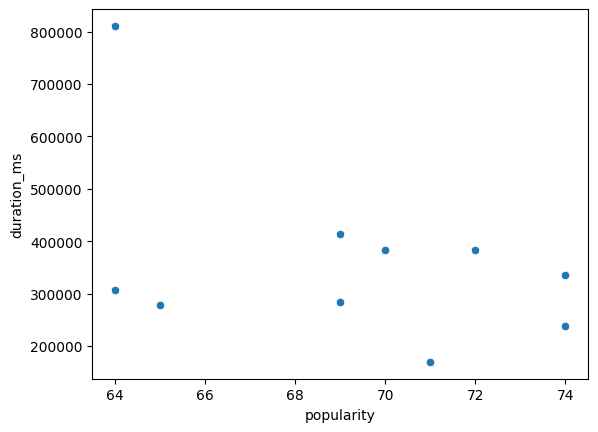

In [7]:
#Visualizamos la popularidad vs la duración de las canciones
import seaborn as sns

scatter_plot = sns.scatterplot(data = tracks_df, x = "popularity", y = "duration_ms")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")